## **1. High Dimensional Data and Overfitting**

* **High dimensional data** is a dataset in which <u> the number of variables is larger than the number of observations. </u> If a dataset has $p$ variables and $n$ observations and $p > n$, then this dataset is high dimensional data. In machine learning literature, independent variables are also called **predictors,** **covariates**, **attributes** or **features**. In this course, we will refer to them as **independent variables.**

In Module 1, we talked about using principal component analysis or factor analysis, two data dimension reduction tools to solve high dimensional data issues. You first run either PCA or factor analysis to decide what variables to keep and run the linear regression model after you decide on the independent variables from PCA or factor analysis. 

In this lesson, we will introduce a different general method to handle the problem of too many variables: **penalized regression.** 

When we have too many variables and use all of them to build a linear regression model, we run the risk of **overfitting** the model. In an OLS regression model, we try to minimize **residual sum of squares (RSS)**, which the following objective function:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p}X_{pi})^{2} $$

In the OLS objective function, we can see there is no restriction on how many $\beta$ (also independent variables) there are in the function. What if we assign some sort of penalty to each additional $\beta$ every time we add one new independent variable? Penalized regression uses an objective function like the following:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p} X_{pi})^{2} + \lambda \sum_{j=1}^{p} f(\beta_j) $$

where $f(.)$ is called a **regularization function** or **penalty function**. A **penalty function** will try to pull the value of a coefficient close to $0$ if the value is too large. <u> The function basically tries to reduce the impact of an independent variable in the model if the coefficient of this independent variable is too large. </u> It is a function that penalizes the existence of an independent variable in a model by suppressing the value of its coefficient. In an extreme case, this function may pull the coefficient to $0$. When the coefficient is $0$, it means the independent variable is removed from the model. The action of pulling a coefficient value towards $0$ or to a certain preset value is called **shrinkage**, in that you shrink a coefficient.


* What is $\lambda$? 

$\lambda$ is a **regularization parameter**. It controls the **trade-off of variance and bias** for coefficients. What does this mean? In an ideal model, we would like to achieve an accuracy for the estimated coefficients that is as high as possible and standard errors as low as possible for such estimated coefficients.

In OLS, the estimated coefficients are unbiased, which means they are **accurate**. However, the variance of the coefficients can be very high if there are too many variables in the model, as we argued in the previous section. <u> An **OLS** objective function provides **accurate** (unbiased) coefficient estimates but not **stable** estimates (high variance). </u> On the other hand, a **penalty function** can suppress the coefficient estimates from going too far away from $0$. We can see from the penalized regression objective function that there is the original OLS objective function as well as a penalty function. An OLS objective function gives accurate coefficient estimates with high variance. <u> With the addition of the penalty function to the penalized regression objective function, this objective function will produce coefficient estimates with **lower variance**. However, the coefficient estimates from penalized regression will be **biased**. </u>

Why does a penalized regression objective function produce biased coefficient estimates? Because <u> its ability to pull coefficient estimates closer to $0$ will prevent the model from fully minimizing the sum of the distances from the regression line to all data points. </u> This is also the reason we have the penalty function in the penalized regression objective function. We don't want to put too much emphasis on the noisy part of the data.

So how can we balance the trade-off between bias and variance of the estimated coefficients? We use $\lambda$ to balance the two forces. We can use a graph to illustrate the impact of the value of $\lambda$ on total error:

**Figure 2: Trade-Off Graph between Variance and Bias in Penalized Regression**

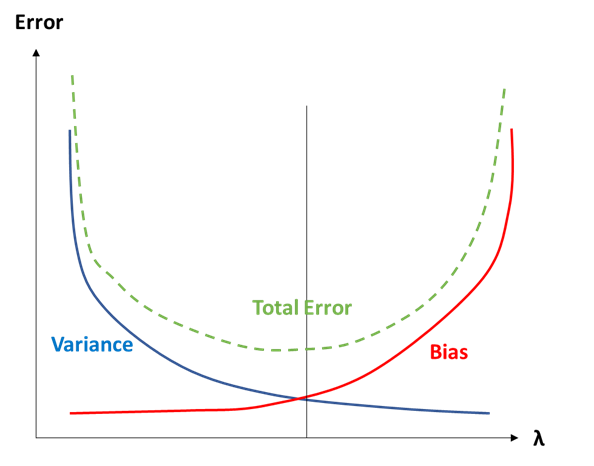


From Figure 2, we can see that as $\lambda$ goes to $0$, the error from variance gets larger and the error from bias gets smaller and vice versa. We would like to find the middle point of $\lambda$ that will give us the lowest total error. So how can we find the optimal $\lambda$?

Before moving on to discuss how to find the optimal $\lambda$, there are steps we need to take to prepare the dataset before we model. 

* <u> The first thing is that the penalty function shouldn't include the intercept, $\beta_{0}$. In general, we don't penalize $\beta_{0}$. </u>

* Note that, in contrast to the ordinary least square regression, ridge regression is highly affected by the scale of the predictors. Therefore, it is better to standardize (i.e., scale) the predictors before applying the ridge regression (James et al. 2014), so that all the predictors are on the same scale. Thus, another important step to take is that of <u> standardizing all independent variables $\large(\frac{x_i}{\sqrt{Var(X_i)}})$. </u> We talked about how the penalty function will pull the value of a coefficient closer to $0$ if the coefficient value is too large. In order for this action to make sense, all independent variables need to be standardized <u> to remove the fact that they could have different **scales**. </u>

Some statistical software packages may conduct independent variable standardization automatically while running a penalized regression. Please check the manual for the specific software package you decide to use for more information.

#### **2.2.4 K-Fold Cross Validation to Find Optimal $\lambda$**

How can we find the optimal $\lambda$? We can use a method called **k-fold cross validation**. You can choose any number for $k$. Usually, 5 and 10 are popular numbers for $k$. Let's use 5-fold cross validation as an example to explain how it works.

Let's assume that $\lambda$ is a value between $0$ and $20$. We will try each of the following $\lambda$: (0, 0.25, 0.5, 0.75, ... , 19.75, 20). <u> There will be a total of 80 values to try for $\lambda$. </u>

The next thing we need to do is to divide our dataset equally into <u> five groups for 5-fold cross validation. </u>

Say that our dataset contains 100 observations. <u> Then, we will create **5 groups** each containing **20 observations**. </u> Let's call our 5 groups $A$, $B$, $C$, $D$, and $E$ where $n=20$ :

* Group $A$ contains observations $x_1, x_2, ..., x_{20}$
* Group $B$ contains observations $x_{21}, x_{22}, ..., x_{40}$
* Group $C$ contains observations $x_{41}, x_{42}, ..., x_{60}$
* Group $D$ contains observations $x_{61}, x_{62}, ..., x_{80}$
* Group $E$ contains observations $x_{81}, x_{82}, ..., x_{100}$


We also have the penalized regression objective function:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta _{p} X_{pi})^{2} + \lambda \sum_{j=1}^{p} f(\beta_j) $$

Now, we have our possible $\lambda$ values to test, five equal groups from our data, and a penalized regression objective function. We are ready to run iterations to generate optimal $\lambda$.

Here are the steps to generate optimal $\lambda$:

1. Choose $\lambda = 0$
2. Choose A as the **testing dataset** and B, C, D, and E together as the **training dataset**.
3. Build a penalized regression model using the training dataset. (because training dataset is $B+C+D+E$, the model will use $x_{21}, x_{22}, ..., x_{100}$ as observations.)
4. Plug testing dataset A into the fitted model from step 3 and calculate the sum of residuals squared (**RSS**) from the fitted model. <u> Keep the sum of squared residuals. </u>
5. Go back to step 2, and this time, select the next group, B, to be the testing dataset and A, C, D, and E together as the training dataset. Now, repeat steps 3, 4, and 5 until each of the five groups has been treated as a testing dataset.
6. Calculate the average sum of squared residuals from the recorded five values of the sum of squared residuals from each of the five different testing datasets.
7. <u> Keep a record of $\lambda$ and its associated **average** sum of squared residuals. </u>
8. Repeat from Step 1 to Step 7 to go through each possible value of $\lambda$
9. Now, you have 80 data points of $\lambda$ and its associated average sum of squared residuals. You can find the optimal $\lambda$ that gives the minimal value of the average sum of squared residuals. The optimal $\lambda$ will be used for the final penalized regression.

This is how 5-fold cross validation works. The same logic applies to $k$-fold cross validations. You equally divide the dataset into $k$ groups and follow the steps above to get the optimal $\lambda$. 

Most of the statistical packages can conduct $k$-fold cross validation for you so you don't have to do it manually. Some software will even choose optimal $\lambda$ for you without any specification about the range to test for $\lambda$. 

Finding a good $\lambda$ is critical to running a penalized regression. Since we now know how to obtain $\lambda$, we can start to look at various types of penalized regression methods. In the following sections, we will learn ridge regression and lasso regression. These two regressions are widely used penalized regression methods.


## **3. Ridge Regression**

The penalty function for ridge regression is the sum of squared coefficients (betas). The mathematical formula is as follows:

$$ f(\beta) = \lambda \sum_{j=1}^{p}  \beta _{j}^{2} = \lambda \| \beta \|^{2} $$

where,

$\lambda :$ regularization parameter

$ \| \beta \| : $ length of the vector $\beta$

The above penalty function is also called an **L2 penalty function**. It is because the function is the square of the magnitude of coefficients in the model.

Here are some key properties of ridge regression:

1. Ridge regression **shrinks** the coefficients of the independent variables that don't contribute very much to the model <u> close to $0$, but not $0$. </u>
2. If $\lambda = 0$, then ridge regression estimation is **OLS** estimation.
3. All the independent variables are still in the model.
4. Ridge regression is good for <u> a model **without many independent variables** while the independent variables have some minor **multicollinearity** issues. </u> What ridge regression does is restrict coefficients of correlated independent variables and make their coefficients similar. When you want to keep all variables but also want to mitigate the multicollinearity issue, ridge regression is a good choice.

## **4. Lasso Regression**

**Lasso regression** is short for **least absolute shrinkage and selection operator**. Lasso regression has the following penalty function:

$$ f(\beta) = \lambda \sum_{j=1}^{p} |\beta _{j}| = \lambda \| \beta \| $$

where,

$\lambda :$ regularization parameter

$ \| \beta \| : $ length of the vector $\beta$

The above penalty function is also called an **L1 penalty function**. It is because the function is the absolute value of the magnitude of coefficients in the model.

Here are some key properties of lasso regression:

1. Lasso regression can shrink the coefficients of the independent variables that don't contribute very much to the model to $0$. Hence, <u> lasso regression can **remove** independent variables. </u> Lasso regression can be used for **variable selection.**
2. If $\lambda = 0$, then a lasso regression estimation is an **OLS** estimation.
3. Lasso regression is a good choice when you have <u> **too many independent variables** and you are looking to select only key variables for the model. </u> Lasso regression can first group independent variables with high correlations together, choose only one of them for the model, and drop the rest.

## **5. An Example: Foreign Exchange Market and Penalized Regression**

Dependent Variable:

**DXY**: U.S. Dollar Index daily return

Independent Variables:

- **METALS**: Gold and Silver Index daily return  <br>
- **US_STK**: S\&P 500 Index daily return <br>
- **X13W_TB**: 13-week Treasury Bills daily return <br>
- **X10Y_TBY**: 10 Year Treasury Bond Yield daily return <br>
- **EURUSD**: EURUSD daily return

Now we can split our data into 80% training set, 20% test set. Or use **K-fold cross-validation** and split our observations into $k$ groups, and start an **iteration** where we first take the group $A_1$ as the test dataset and the groups $A_2, ..., A_k$ as training datasets. Then use all different $\lambda$ values for each test-training pair, calculate the average $RSS$ for each value of $\lambda$ then decide to choose the $\lambda$ value where the $RSS$ is the lowest. Then run **OLS, Ridge, Lasso** regressions and get $R^2$ values to examine them. Here are the steps:

**1.** We first run an **OLS** regression model on the training dataset and get coefficients estimate $\hat{\beta}$. Then we plug the **test dataset** into our model with coefficients estimate $\hat{\beta}$ and save the $R^2$ value.

**2.** We choose a range for regularizing constant $\lambda$. For example let's say $\lambda \in [0, 20]$. Then, we split the range into $n$ lambda values, let's say we have $\lambda = 0.0, 0.5, 0.75, 1.00, ..., 20.0$

**2.** **Choosing $\lambda$:** After fitting OLS, we can actually use **K-fold cross-validation** to find an optimal $\lambda$ value for **ridge and lasso regressions**. Here's how on K-fold cross-validation: We start with $\lambda = 0$. We split our observations into $k$ groups, and start an **iteration** where we first take the group $A_1$ as the test dataset and the groups $A_2, ..., A_k$ as training datasets. Then we fit a **ridge** or **lasso** regression and store the resulting $RSS$ value. Then we take $A_2 as the test dataset and the groups $A_1, A_3, ..., A_k$ as the training dataset, fit the regression and store the $RSS$ value again. Then when all groups are used as test datasets, we take the average of all $k$ $RSS$ values and store that average value. Then, we increment our lambda value, let's say $\lambda=0.5$ and do the whole process again until all range of $\lambda$ is exhausted. Then we examine the average $RSS$ values and pick the value of $\lambda$ where the average $RSS$ is the lowest.

**3.** After choosing our ideal $\lambda$, we fit a **ridge regression** model and save the $R^2$ value.

**4.** Do the steps **2.** and **3.** for **lasso regression**.

For the sake of simplicity, we'll use library functions for $k$ fold cross validation here.

In [21]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [22]:
data_set_r_working = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M2/fin_data_set.csv")
data_set_r_working.head(10)

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016
5,1/11/2016,0.001928,-0.057749,-0.052774,0.000990,-0.003527,-0.078947,0.013146,0.001378,2016
6,1/12/2016,0.002431,-0.034475,-0.030882,0.008069,0.003982,0.200000,-0.025950,-0.007590,2016
7,1/13/2016,-0.000404,0.004667,0.001314,-0.024941,-0.010137,0.023810,-0.017127,-0.001290,2016
8,1/14/2016,0.001617,-0.035540,0.023622,0.016417,0.005788,0.116279,0.015489,0.003875,2016
9,1/15/2016,-0.001312,-0.002409,-0.057051,-0.021466,-0.030544,-0.070833,-0.030982,-0.002487,2016


## **Data preparation**<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [23]:
# Create Training Dataset and Testing Dataset
data_set_r_working = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M2/fin_data_set.csv")

np.random.seed(11111)  # Random seed
nrow = data_set_r_working.shape[0]  # number of rows, this is used to know how many observations are available.
print("nrow =", nrow)

train_sequence = sorted(np.random.choice(nrow, int(nrow * 0.8), replace=False))  # randomly select 80% of the indices out of nrow = 250 indices and store it as training set indices.
test_sequence = sorted(set(list(range(0, nrow))) - set(train_sequence))  # substract the training set indices from the nrow = 250 indices, thus resulting in test set indices.
print("training set indices =", train_sequence)
print("test set indices     =", test_sequence)
print("  Indices represent the i th observation. (starting from 0)")

nrow = 250
training set indices = [0, 1, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 60, 62, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 91, 92, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 194, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 226, 227, 228, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249]
test set indices     = [2, 3, 5, 10, 11, 25, 28, 36,

* **train_sequence** is a randomly selected subset of **indices**, <u> representing 80% of the dataset, used for training the model. </u>

* **test_sequence** is created by subtracting train_sequence from the set of all **indices**, <u> resulting in the remaining 20% used for testing the model. </u>

In [24]:
train = data_set_r_working.filter(items=train_sequence, axis=0)  # filter with respect to indices of rows
test = data_set_r_working.filter(items=test_sequence, axis=0)  # filter with respect to indices of rows

# Make sure X matrix is in matrix form and Y is in vector form
ind_var = ["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"]  # Choose independent (predictor) variables

train.head(10)

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016
6,1/12/2016,0.002431,-0.034475,-0.030882,0.008069,0.003982,0.200000,-0.025950,-0.007590,2016
7,1/13/2016,-0.000404,0.004667,0.001314,-0.024941,-0.010137,0.023810,-0.017127,-0.001290,2016
8,1/14/2016,0.001617,-0.035540,0.023622,0.016417,0.005788,0.116279,0.015489,0.003875,2016
9,1/15/2016,-0.001312,-0.002409,-0.057051,-0.021466,-0.030544,-0.070833,-0.030982,-0.002487,2016
12,1/21/2016,-0.000303,0.012968,0.112241,0.005602,0.002787,0.079051,0.017641,-0.003296,2016
13,1/22/2016,0.005148,0.007385,0.090078,0.020515,0.031033,0.054945,0.014364,-0.001379,2016
14,1/25/2016,-0.002109,0.028592,-0.057471,-0.015116,-0.009434,-0.045139,-0.012695,-0.005799,2016


* The DataFrame **train** is created by filtering **data_set_r_working** for the indices in **train_sequence**.

* Similarly, **test** is created for indices in **test_sequence**.

In [25]:
train_x = train.loc[:, ind_var]
train_y = train.DXY

test_x = test.loc[:, ind_var]
test_y = test.DXY

(sm.add_constant(train_x)).head(10)  # add a constant column of 1's as a value for beta_0  (the intercept)

,const,METALS,US_STK,X10Y_TBY,X13W_TB,EURUSD
0,1.0,0.024283,-0.013980,-0.010577,0.047297,-0.007316
1,1.0,-0.004741,0.001691,0.001336,0.322581,-0.002436
4,1.0,-0.028064,-0.010977,-0.010683,0.000000,0.013636
6,1.0,-0.034475,0.008069,-0.025950,0.200000,-0.007590
7,1.0,0.004667,-0.024941,-0.017127,0.023810,-0.001290
8,1.0,-0.035540,0.016417,0.015489,0.116279,0.003875
9,1.0,-0.002409,-0.021466,-0.030982,-0.070833,-0.002487
12,1.0,0.012968,0.005602,0.017641,0.079051,-0.003296
13,1.0,0.007385,0.020515,0.014364,0.054945,-0.001379
14,1.0,0.028592,-0.015116,-0.012695,-0.045139,-0.005799


* **train_x** and **test_x** are *matrices* of the training and testing sets, respectively, containing *only* the independent variables in **ind_var**.

* **train_y** and **test_y** are *vectors* containing *only* the dependent variable **DXY** from the training and testing sets, respectively.

In [26]:
test_tot = test.loc[:, ["DXY", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"]]  # test total

* **test_tot** is a *DataFrame* containing both the independent variables and the dependent variable for the testing set, which might be used for later analysis or validation.

## **OLS Regression**

In [27]:
# OLS Regression
ols_final = sm.OLS(train_y, sm.add_constant(train_x)).fit()
print(ols_final.summary2().tables[1])  # print only coefficients

# Compute test R^2 and test mean squared error
ols_pred = ols_final.predict(sm.add_constant(test_x))
ols_pred = pd.DataFrame(ols_pred, columns=["ols_p"])
ols_actual = test.DXY

ols_rss = np.sum(np.power(ols_pred.ols_p - ols_actual, 2))
ols_tss = np.sum(np.power(ols_actual - np.mean(ols_actual), 2))
ols_rsq = 1 - (ols_rss / ols_tss)
print("\n OLS_R^2", ols_rsq)

ols_MSE = np.sqrt(ols_rss / test.shape[0])
print(" OLS_MSE", ols_MSE)

             Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
const     0.000410  0.000310  1.321022  1.880502e-01 -0.000202  0.001022
METALS   -0.070259  0.010999 -6.387663  1.219474e-09 -0.091952 -0.048566
US_STK   -0.058324  0.040419 -1.442997  1.506340e-01 -0.138040  0.021392
X10Y_TBY  0.019521  0.013955  1.398854  1.634535e-01 -0.008002  0.047045
X13W_TB   0.000696  0.003924  0.177426  8.593591e-01 -0.007044  0.008436
EURUSD   -0.087070  0.059863 -1.454492  1.474259e-01 -0.205135  0.030995

 OLS_R^2 0.10633201319436225
 OLS_MSE 0.00381807095301603


## **Ridge Regression**

In [28]:
# Ridge Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(-4, 4, 0.1)]
alphas = lambdas

print("lambdas =", lambdas)

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Use 10-fold Cross Validation to find optimal lambda and then fit the model
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring="neg_mean_squared_error").fit(train_x, train_y)
print("Ridge optimal lambda =", ridge_cv.alpha_)

# Build final ridge regression model
ridge_final = Ridge(alpha=ridge_cv.alpha_, fit_intercept=True).fit(train_x, train_y)
# ridge_final.fit(train_x, train_y)

# Print coefficients
# print('Intercept:', ridge_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (ridge_final.coef_),
        index=["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
ridge_pred = ridge_final.predict(test_x)
ridge_actual = test.DXY
ridge_rss = np.sum(np.power(ridge_pred - ridge_actual, 2))
ridge_tss = np.sum(np.power(ridge_actual - np.mean(ridge_actual), 2))
ridge_rsq = 1 - ridge_rss / ridge_tss
print("\n Ridge_R^2", ridge_rsq)

ridge_MSE = np.sqrt(ridge_rss / test.shape[0])
print("Ridge_MSE", ridge_MSE)

lambdas = [0.0001, 0.00012589254117941674, 0.00015848931924611142, 0.0001995262314968881, 0.0002511886431509582, 0.00031622776601683826, 0.00039810717055349773, 0.000501187233627273, 0.0006309573444801943, 0.0007943282347242829, 0.001000000000000002, 0.00125892541179417, 0.0015848931924611173, 0.001995262314968885, 0.0025118864315095872, 0.003162277660168389, 0.0039810717055349856, 0.00501187233627274, 0.006309573444801955, 0.007943282347242847, 0.01000000000000004, 0.012589254117941727, 0.015848931924611207, 0.01995262314968889, 0.025118864315095923, 0.03162277660168396, 0.039810717055349935, 0.050118723362727505, 0.06309573444801969, 0.07943282347242862, 0.10000000000000062, 0.1258925411794175, 0.1584893192461124, 0.1995262314968893, 0.25118864315095973, 0.3162277660168402, 0.3981071705535002, 0.5011872336272761, 0.6309573444801981, 0.7943282347242878, 1.0000000000000082, 1.2589254117941764, 1.5848931924611271, 1.9952623149688993, 2.511886431509603, 3.1622776601684053, 3.981071705535

Ridge optimal lambda = 0.03162277660168396

              Coef.
METALS   -0.061364
US_STK   -0.016407
X10Y_TBY  0.015374
X13W_TB   0.001258
EURUSD   -0.012517

 Ridge_R^2 0.12384290357405481
Ridge_MSE 0.003780479486607714


## **LASSO Regression**

In [29]:
# LASSO Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(6, -6, -0.1)]

# Compile and fit model
lasso_cv = LassoCV(cv=10, alphas=lambdas).fit(train_x, train_y)
print("Lasso optimal lambda =", lasso_cv.alpha_)
# lasso_cv.fit(train_x, train_y)  # Fit Model

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Build final LASSO regression model
lasso_final = Lasso(alpha=lasso_cv.alpha_, fit_intercept=True)
lasso_final.fit(train_x, train_y)

# Print results
# print('Intercept:', lasso_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (lasso_final.coef_),
        index=["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
lasso_pred = lasso_final.predict(test_x)
lasso_actual = test.DXY
lasso_rss = np.sum(np.power(lasso_pred - lasso_actual, 2))
lasso_tss = np.sum(np.power(lasso_actual - np.mean(lasso_actual), 2))
lasso_rsq = 1 - lasso_rss / lasso_tss
print("\n LASSO_R^2: ", lasso_rsq)

lasso_MSE = np.sqrt(lasso_rss / test.shape[0])
print("LASSO_MSE: ", lasso_MSE)

Lasso optimal lambda = 1.5848931924612534e-05

              Coef.
METALS   -0.059688
US_STK   -0.000000
X10Y_TBY  0.000000
X13W_TB   0.000000
EURUSD   -0.000000

 LASSO_R^2:  0.14151036558996766
LASSO_MSE:  0.00374216922006709


### **All of the results in one table**

In [30]:
# All of the results in one table

OLS_df = pd.DataFrame(ols_final.summary2().tables[1]["Coef."]).rename(
    columns={"Coef.": "OLS"}
)

Ridge_df = pd.DataFrame(
    np.insert(ridge_final.coef_, 0, ridge_final.intercept_),
    index=["Intercept", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
    columns=["Ridge"],
)

Lasso_df = pd.DataFrame(
    np.insert(lasso_final.coef_, 0, lasso_final.intercept_),
    index=["Intercept", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
    columns=["Lasso"],
)

df = OLS_df.merge(Ridge_df, left_index=True, right_index=True)
df = df.merge(Lasso_df, left_index=True, right_index=True)

pd.concat([df, pd.DataFrame({"OLS": [ols_rsq, ols_MSE], "Ridge": [ridge_rsq, ridge_MSE], "Lasso": [lasso_rsq, lasso_MSE]}, index=["R sq", "Mean Sq. Err"])], ignore_index=False)

,OLS,Ridge,Lasso
METALS,-0.070259,-0.061364,-0.059688
US_STK,-0.058324,-0.016407,-0.000000
X10Y_TBY,0.019521,0.015374,0.000000
X13W_TB,0.000696,0.001258,0.000000
EURUSD,-0.087070,-0.012517,-0.000000
R sq,0.106332,0.123843,0.141510
Mean Sq. Err,0.003818,0.003780,0.003742


Figure 3 shows the model results from our three methods. The table includes coefficients, test $R^2$ and test mean squared error for OLS, ridge and lasso regressions. From Figure 3, we can see lasso has the best $R^2$ for the testing dataset, followed by ridge with OLS being the worst. We also notice that there is only one independent variable, *METALS*, which has a non-0 coefficient. Lasso only selects *METALS* for the regression model. Lasso makes the model very simple, yet it has the best fit for testing data. 

